## Проект по визуализации данных

##### Проект посвящен исследованию рейтинговых оценок фильмов веб-сайта Fandango по мотивам статьи на сайте fivethirtyeight.com 
Цель - доказать, возможно ли прийти к тем же выводам, которые приведены в статье.

Основной вопрос: возникает ли конфликт интересов на веб-сайте, который продает билеты на фильмы, а также отображает их рейтинги? Ведь при низких оценках кинокартин у людей будет меньше желания их смотреть - а, следовательно, и меньше мотивации покупать на них билеты. 

[Ссылка на оригинальную статью.](https://fivethirtyeight.com/features/fandango-movies-ratings/)

### Данные

##### 
Исходные данные для статьи [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) находятся в свободном доступе  на [github](https://github.com/fivethirtyeight/data). Это два csv-файла. В одном файле данные о рейтингах от компании Fandango, а в другом - агрегированные данные о рейтингах от других компаний, таких как Metacritic, IMDB и Rotten Tomatoes.

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
all_sites_scores = pd.read_csv ('all_sites_scores.csv')
fandango_scrape = pd.read_csv ('fandango_scrape.csv')

-----

Файл `all_sites_scores.csv` содержит все фильмы, для которых есть рейтинг Rotten Tomatoes, рейтинг RT User, оценка Metacritic, оценка Metacritic User и оценка IMDb, а также как минимум 30 отзывов от фанатов на Fandango. Данные Fandango были выгружены 24 августа 2015.

Колонка | Определение
--- | -----------
FILM | Название фильма
RottenTomatoes | Оценка "Rotten Tomatoes Tomatometer" для этого фильма
RottenTomatoes_User | Оценка "Rotten Tomatoes user" для этого фильма
Metacritic | Оценка "Metacritic" для этого фильма
Metacritic_User | Оценка "Metacritic user" для этого фильма
IMDB | Оценка "IMDb user" для этого фильма
Metacritic_user_vote_count | Количество голосов за этот фильм от пользователей Metacritic
IMDB_user_vote_count | Количество голосов за этот фильм от пользователей IMDb

Файл `fandango_scrape.csv` содержит данные о фильмах с Fandango.

Колонка | Определение
--- | ---------
FILM | Название фильма
STARS | Количество звёзд на Fandango.com
RATING |  Рейтинг Fandango - значение, прочитанное с HTML-страницы. Это средний рейтинг фильма.
VOTES | Количество голосов пользователей, которые написали отзыв о фильме (на момент выгрузки данных).
-----

In [3]:
fandango_scrape.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
all_sites_scores.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


## **Сравнение рейтингов Fandango с рейтингами пользователей на этом же сайте**

График, показывающий связь между популярностью фильма и его рейтингом - связь между колонками RATING и VOTES. 

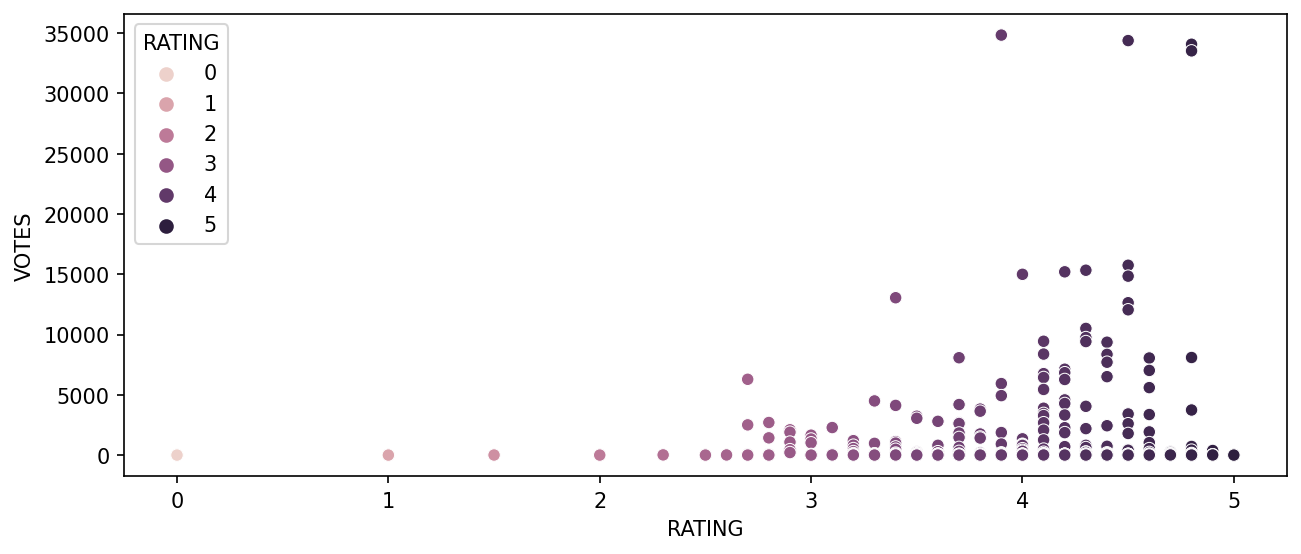

In [249]:
plt.figure(figsize = (10,4), dpi = 150)
sns.scatterplot (x='RATING', y = 'VOTES', data = fandango_scrape, hue='RATING');

In [250]:
b = fandango_scrape.drop(['FILM'], axis=1)
b.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


#### 
Между клонками RATING и VOTES особой взаимосвязи нет.

### Рассмотрим количество фильмов относительно их года выхода.

In [5]:
 title = 'Название Фильма (Год)' 
title.split ('(')[-1].replace(')', '')

fandango_scrape['YEAR'] = fandango_scrape['FILM'].apply(lambda title:title.split ('(')[-1].replace(')', ''))

In [6]:
fandango_scrape.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [7]:
fandango_scrape['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

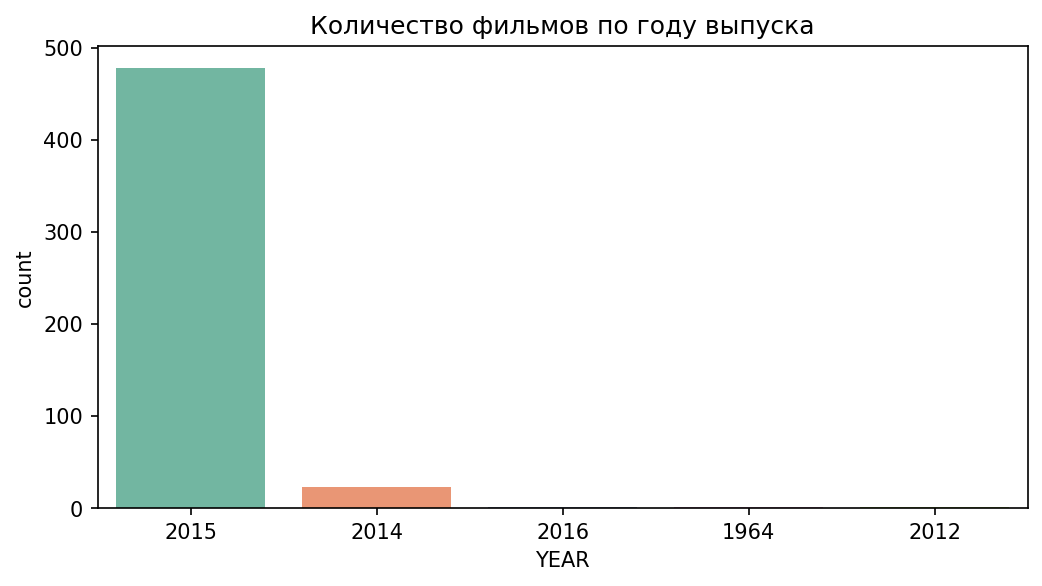

In [254]:
plt.figure (figsize=(8,4), dpi = 150)
plt.title('Количество фильмов по году выпуска')
sns.countplot(x='YEAR', data = fandango_scrape, palette='Set2');

#### Посмотрим, какие 10 фильмов получили наибольшее количество голосов.

In [8]:
fandango_scrape.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [9]:
len(fandango_scrape [fandango_scrape['VOTES'] == 0])

69

In [10]:
# 69 строк без голосов пользователей
fan_voted = fandango_scrape [fandango_scrape['VOTES']>0]

### График KDE plot, который отображает распределение отображаемых рейтингов (STARS) и истинных рейтингов на основе голосов пользователей (RATING).

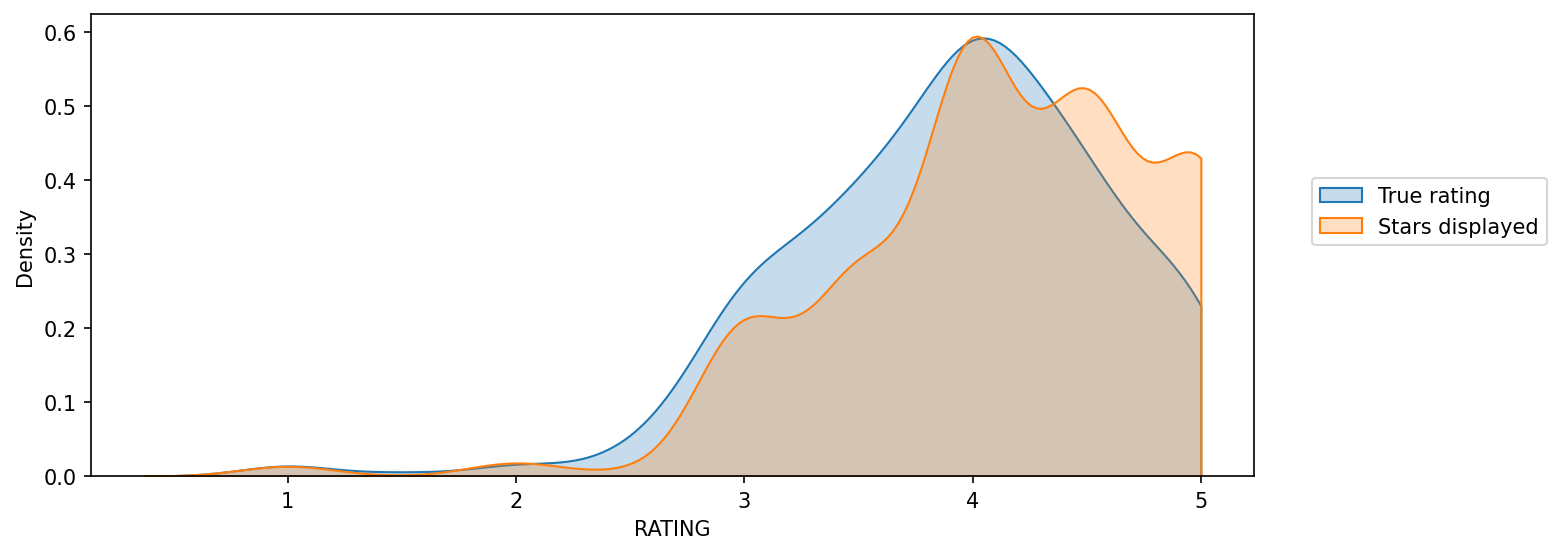

In [258]:
plt.figure(figsize=(10,4), dpi = 150)
sns.kdeplot(data = fan_voted, x = 'RATING', clip = [0,5], fill = True, label = 'True rating')
sns.kdeplot(data = fan_voted, x = 'STARS', clip = [0,5], fill = True, label = 'Stars displayed')
plt.legend(loc=(1.05,0.5));

#### Посчитаем эту разницу в численном виде. 

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
fan_voted['STARS_DIFF'] = fandango_scrape['STARS'] - fandango_scrape ['RATING']
fan_voted['STARS_DIFF'] = fan_voted['STARS_DIFF'].round(1)

In [13]:
fan_voted

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


### Нарисуем график Count Plot для отображения того, сколько раз встречается то или иное значение разницы между STAR и RATING.

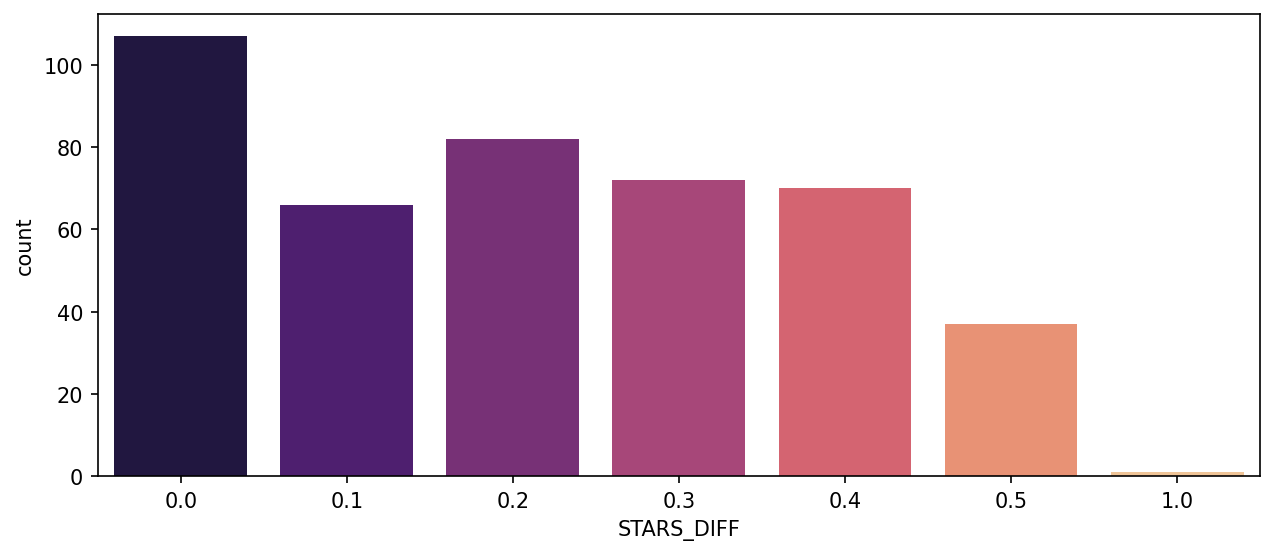

In [261]:
plt.figure(figsize=(10,4), dpi = 150)
sns.countplot(data = fan_voted, x = 'STARS_DIFF', palette='magma');

#### Мы имеем около ста оценок фильмов, которые совпадают. Но что происходит далее? Оценки с сайта и реальные отличаются на 0.1, на 0.3 и даже на целую единицу!

In [14]:
fan_voted[ fan_voted['STARS_DIFF'] == 1 ]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


#### Фильм, в котором разница оценки "единица" - Turbo Kid (2015).

#### По итогу можем сделать вывод, что рейтинги с сайта и те, что дают реальные пользователи, действительно отличаются. Более того, округление оценок происходит в большую сторону и почти никогда в меньшую.

## **Сравнение рейтингов других компаний**

In [15]:
all_sites_scores.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660


### Рейтинги от Rotten Tomatoes

Начнём с рейтингов Rotten Tomatoes. Здесь два набора рейтингов - рейтинги, опубликованные официальными критиками, и пользовательские рейтинги. 

Нарисуем график Scatterplot, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами.

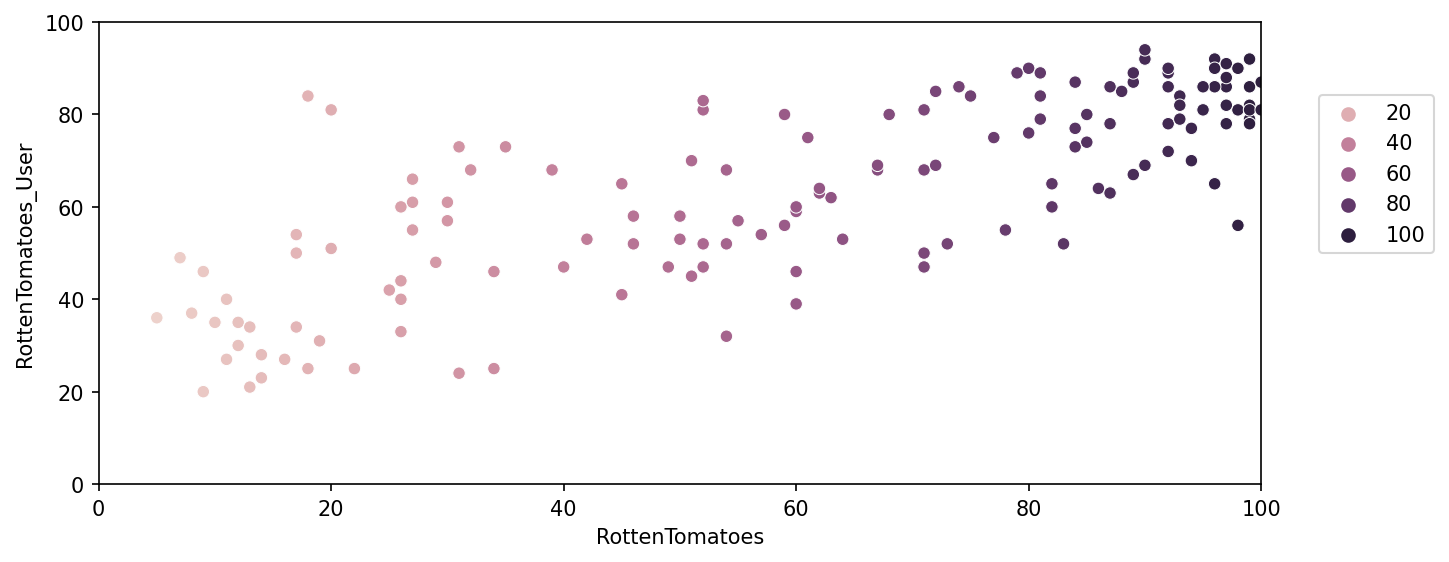

In [264]:
plt.figure(figsize=(10,4), dpi =150)
sns.scatterplot(data=all_sites_scores, x = 'RottenTomatoes', y ='RottenTomatoes_User', hue = 'RottenTomatoes')
plt.xlim(0,100)
plt.ylim(0,100)
plt.legend(loc=(1.05,0.5));

#### Изучим численную разницу между этими двумя рейтингами. 
Мы посчитаем разнцу RottenTomatoes и RottenTomatoes_User. Полученные значения Rotten_Diff - это рейтинг критиков минус рейтинг пользователей. Близкие к нулю значения говорят о том, что критики и пользователи согласны друг с другом. Большие положительные значения - когда критики оценили фильм намного выше, чем пользователи. А большие отрицательные значения - наоборот, пользователи оценили фильм намного выше, чем критики.

In [16]:
all_sites_scores['Rotten_Diff'] = all_sites_scores['RottenTomatoes'] - all_sites_scores['RottenTomatoes_User']

Посчитаем среднее значение полученной разницы по всему набору данных. Поскольку разница может быть как положительной, так и отрицательной, сначала возьмём абсолютные величины всех значений, и только после этого посчитаем среднее значение. Таким образом мы получим среднее значение абсолютной разницы между рейтингами от критиков и пользовательскими рейтингами.

In [17]:
all_sites_scores['Rotten_Diff'].apply(abs).mean()

15.095890410958905

Для визуализации этой разницы построим два графика.

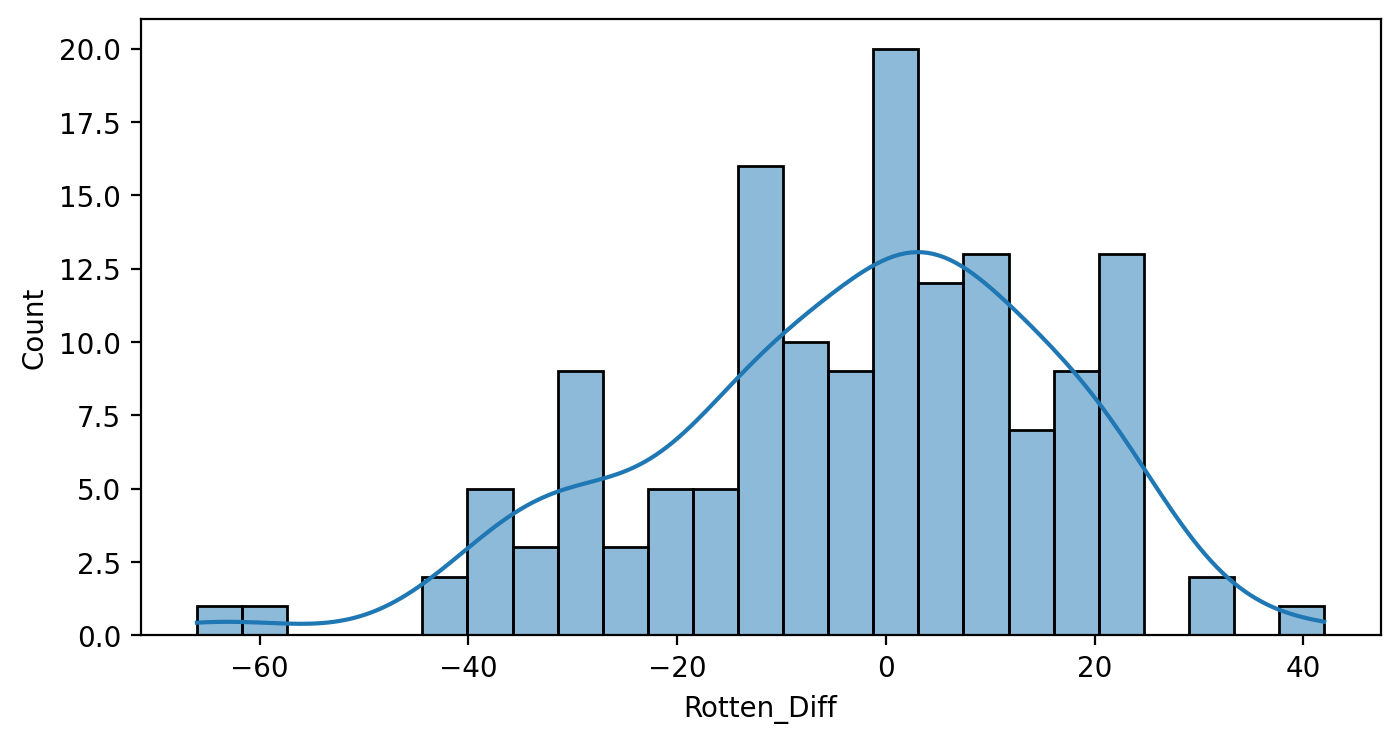

In [267]:
plt.figure(figsize=(8,4), dpi = 200)
sns.histplot(data = all_sites_scores, x = 'Rotten_Diff', kde = True, bins = 25);

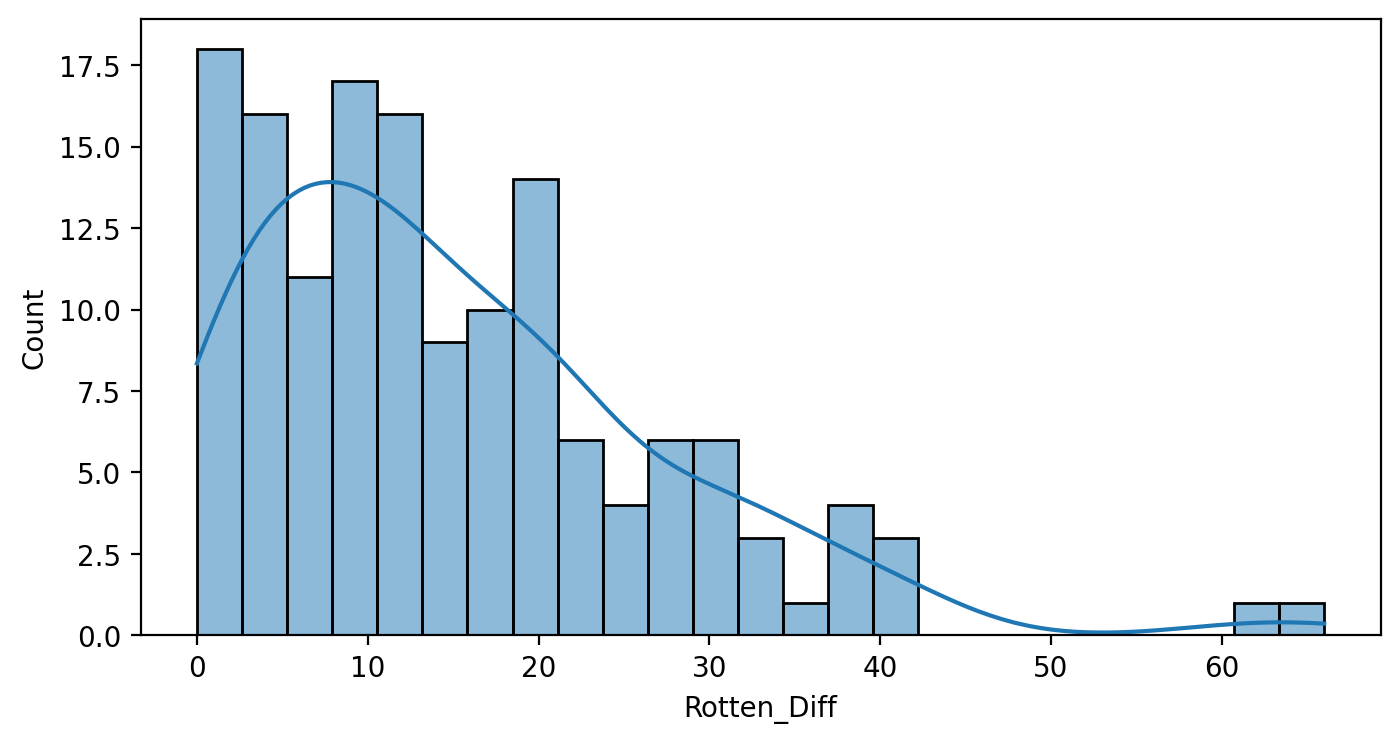

In [268]:
plt.figure(figsize=(8,4), dpi = 200)
sns.histplot( x = all_sites_scores['Rotten_Diff'].apply(abs), kde = True, bins = 25);

### Выясним, какие фильмы наиболее отличаются по рейтингам.

Сначала выведем 5 фильмов с наибольшей по модулю разницей рейтингов. Поскольку мы вычисляли разницу рейтингов по формуле Critics Rating - Users Rating, большие по модулю отрицательные значения говорят о том, что пользователи в среднем оценили эти фильмы намного выше, чем критики.

In [18]:
# пользователи в среднем оценили эти фильмы намного выше, чем критики
all_sites_scores.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


#### 
Выведем 5 фильмов с наибольшей по модулю разницей рейтингов. Большие по модулю положительные значения говорят о том, что критики  в среднем оценили эти фильмы намного выше, чем пользователи.

In [20]:
all_sites_scores.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


### Рейтинги от MetaCritic

Они тоже отображают два типа рейтингов - как свои официальные рейтинги, так и пользовательские рейтинги.

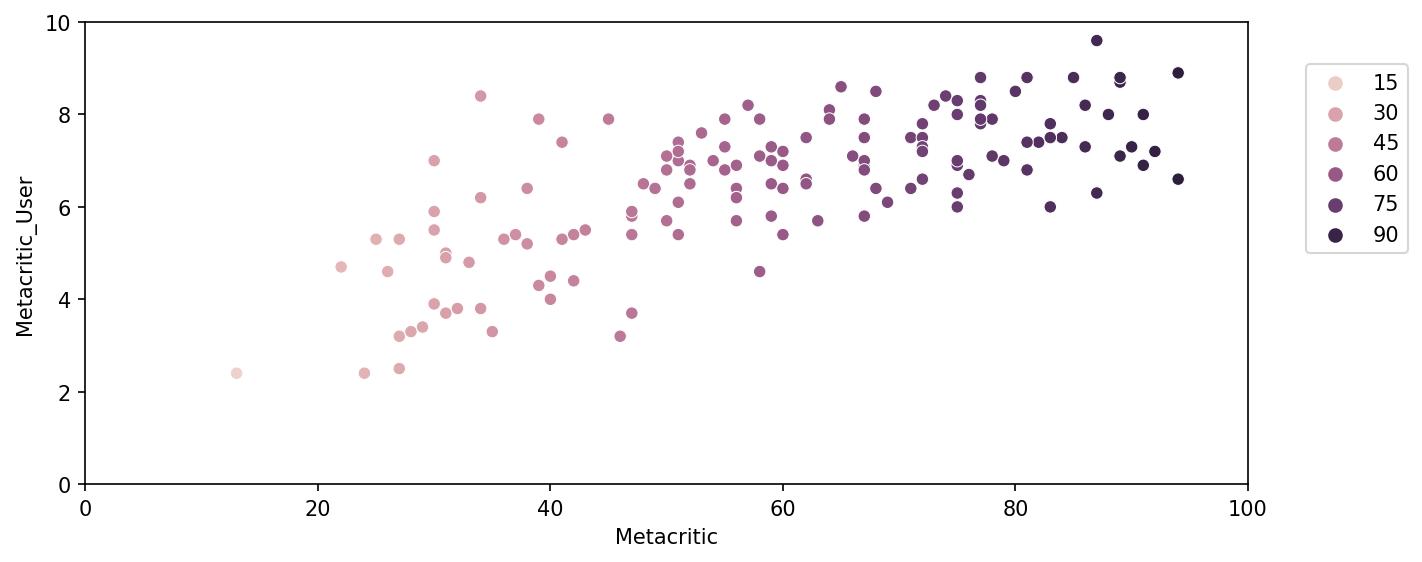

In [271]:
plt.figure(figsize=(10,4), dpi =150)
sns.scatterplot(data=all_sites_scores, x = 'Metacritic', y ='Metacritic_User', hue = 'Metacritic')
plt.xlim(0,100)
plt.ylim(0,10)
plt.legend(loc=(1.05,0.5));

#### Рейтинги от IMDB

Посмотрим на рейтинги от IMDB. Metacritic и IMDB показывают количество голосов. Посмотрим на наиболее популярные фильмы.

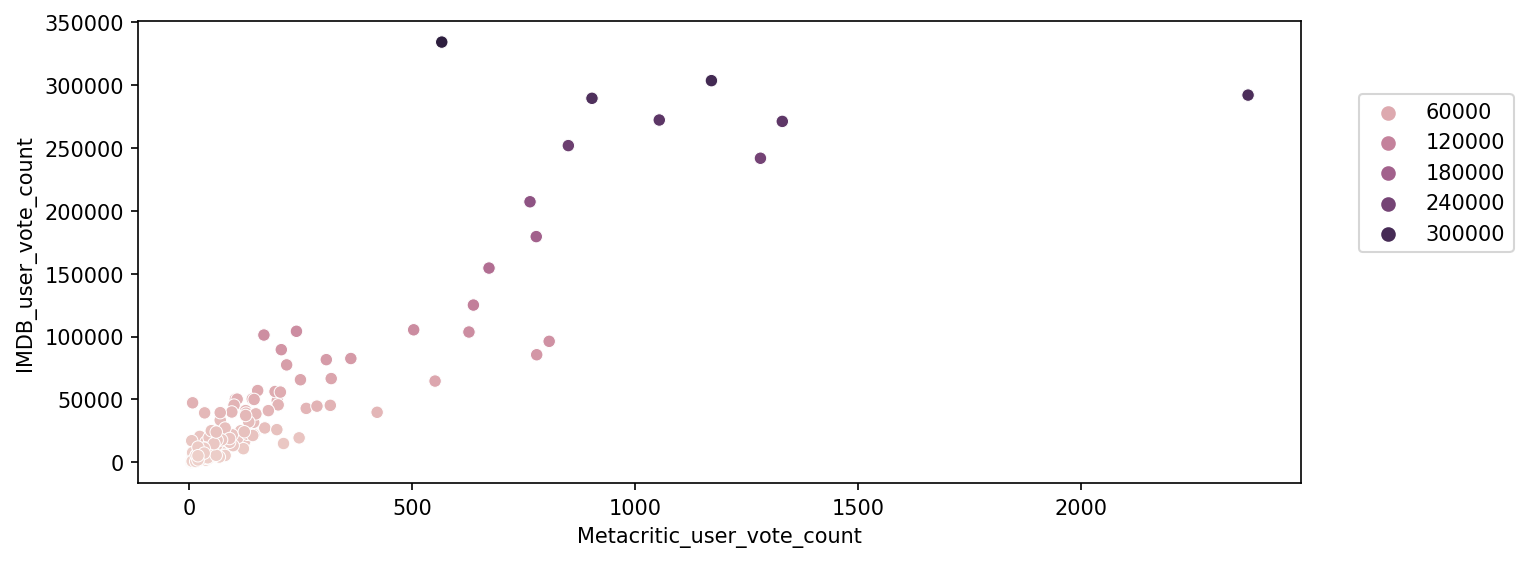

In [272]:
plt.figure(figsize=(10,4), dpi =150)
sns.scatterplot(data=all_sites_scores, x = 'Metacritic_user_vote_count', y ='IMDB_user_vote_count', hue = 'IMDB_user_vote_count')
plt.legend(loc=(1.05,0.5));

#### 
У нас есть две точки, которые четко отличаются от других. Фильм, который получил наибольшее количество голосов на IMDB:

In [273]:
all_sites_scores.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


Фильм, который получил наибольшее количество голосов на Metacritic:

In [274]:
all_sites_scores.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


### **Сравнение рейтингов Fandango с рейтингами других компаний**

In [21]:
df = pd.merge( fandango_scrape, all_sites_scores, on = 'FILM', how = 'inner')
df.head(3)

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


#### Нормализация значений
Компании Rotten Tomatoes, Metacritic и IMDB используют другую шкалу измерения рейтингов, неели шкала от 0 до 5 звезд в Fandango. Чтобы выполнить сравнения, нужно эти значения нормализовать, чтобы они попадали с диапазон от 0 до 5 звёзд.

In [24]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [25]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20,1)

df['M_Norm'] = np.round(df['Metacritic']/20,1)
df['MU_Norm'] = np.round(df['Metacritic_User']/2,1)

df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [26]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'RT_Norm', 'RTU_Norm', 'M_Norm', 'MU_Norm', 'IMDB_Norm'],
      dtype='object')

In [27]:
norm_scores = df.drop(columns=['FILM','VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count','Rotten_Diff'])

In [28]:
norm_scores.head(3)

,STARS,RATING,RT_Norm,RTU_Norm,M_Norm,MU_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7


### Сравнение распределений рейтингов от разных компаний

In [29]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

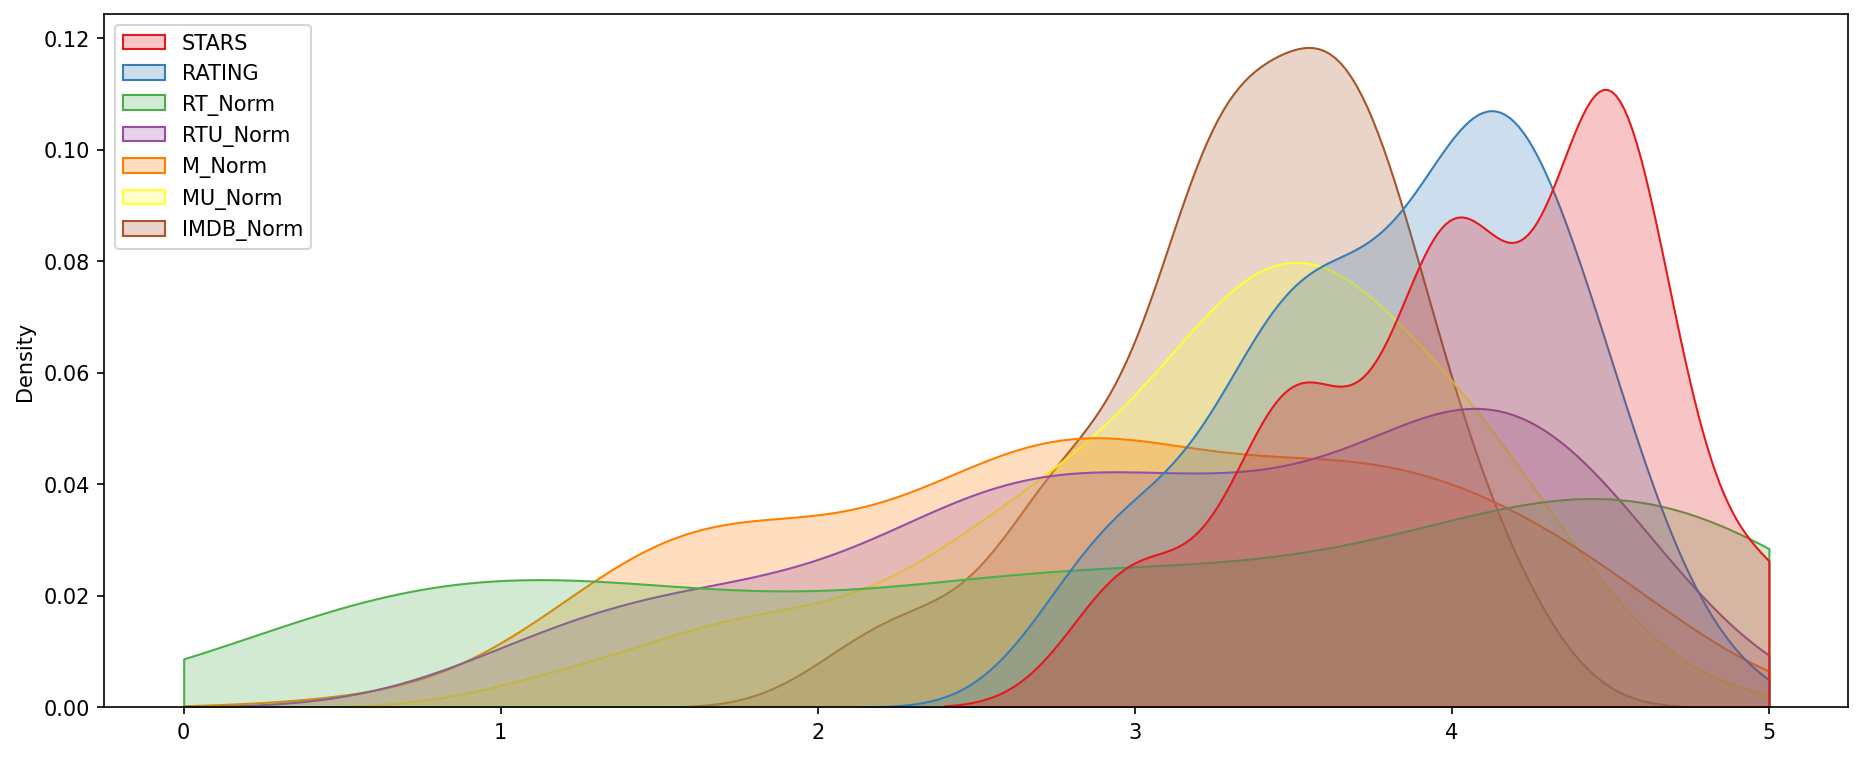

In [30]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

#### Здесь мы видим, что оценкам IMBD соответствует нормальное распределение, а рейтинги Fandango очень сдвинуты справо - скорее всего они искусственно завышены. Интересно также, что рейтинги RT от критиков имеют очень пологое распределение. Сравним только эти два распределения.

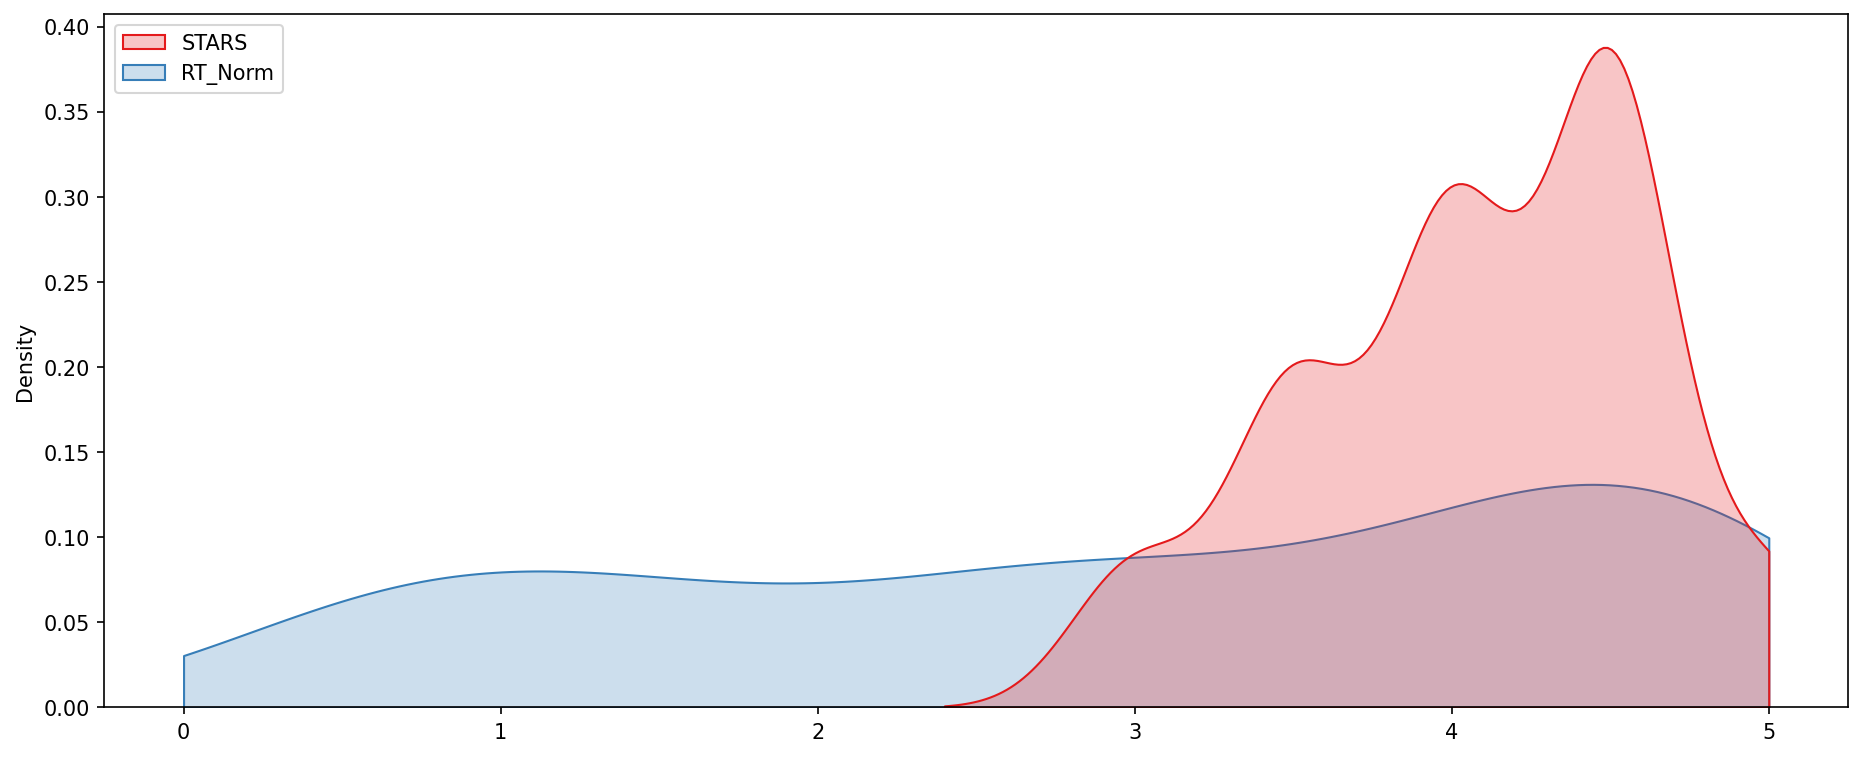

In [32]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[['STARS', 'RT_Norm']], clip=[0,5], palette = 'Set1', shade=True, ax=ax)
move_legend(ax, "upper left")

#### Мы увидели, что рейтинги Fandango явно выше рейтингов других компаний, особенно если смотреть на округлённые вверх значения рейтингов. 
Давайте посмотрим на 10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic - какие это 10 фильмов? Какие нормализованные рейтинги дали этим фильмам другие компании? 

In [33]:
norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','M_Norm','MU_Norm','IMDB_Norm','FILM']]
norm_films.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,M_Norm,MU_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


#### Визуализируем распределение рейтингов от всех компаний для 10 фильмов с наихудшими рейтингами.

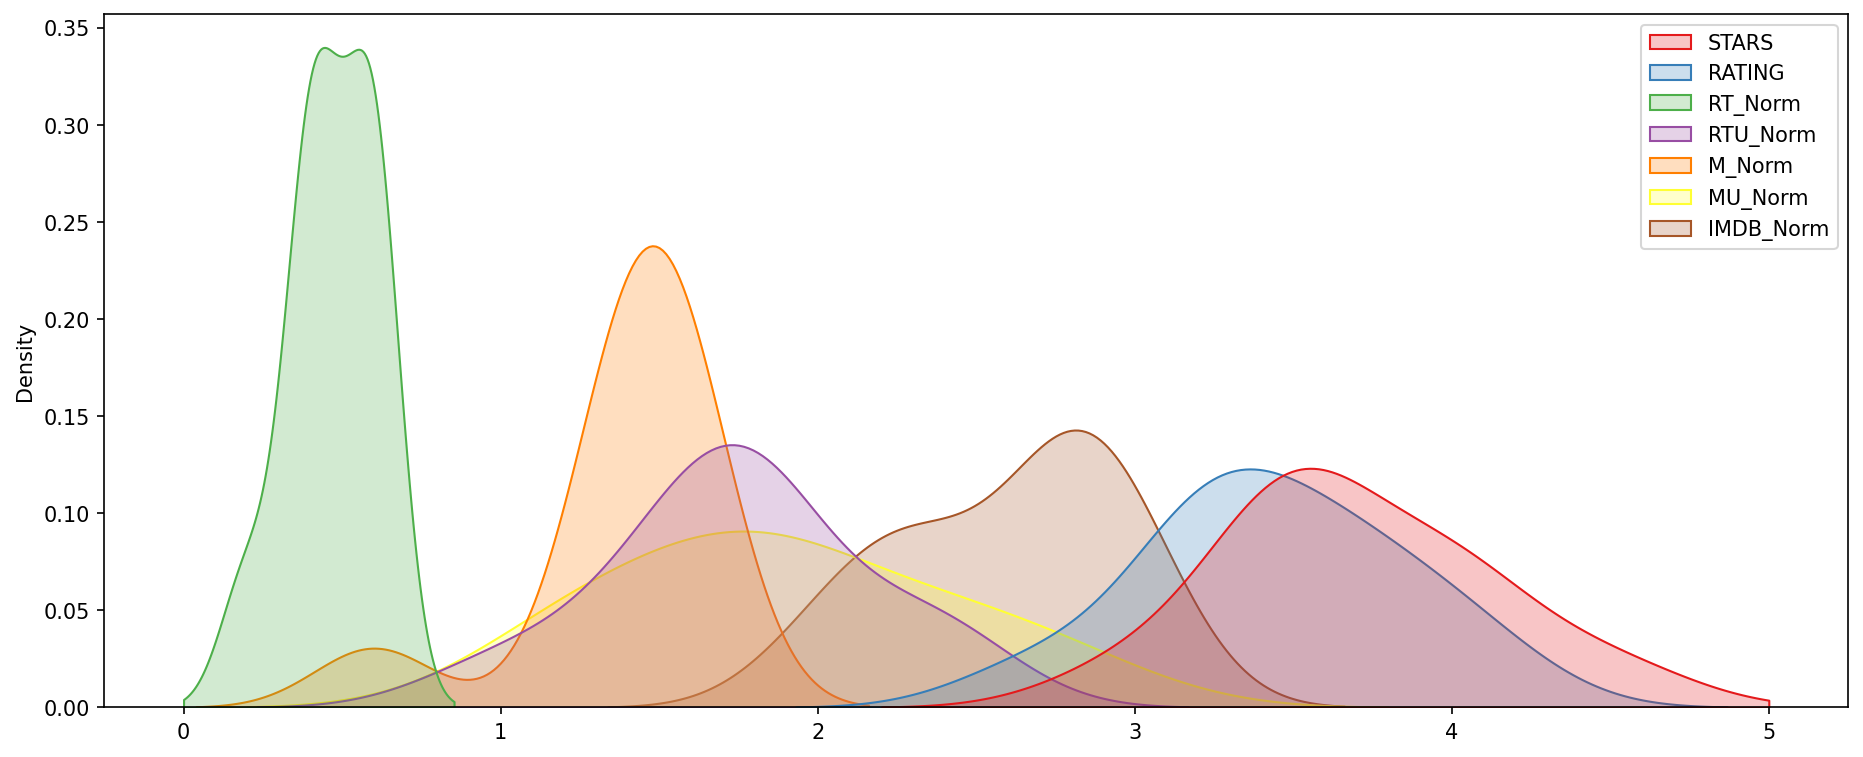

In [34]:
plt.figure(figsize=(15,6),dpi=150)
worst_films = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1');

### Как мы видим, наиболее "сурово" к оценкам относится RottenTomatoes - среднее значение  наиудших оценок лежит в диапазоне от 0 до 1, но при этом Fandango считает эти фильмы вполне приемлимыми для просмотра.

### **Больше всего отличается фильм Taken 3! - Fandango дал ему рейтинг 4.5 звёзд, хотя этот фильм получил средний рейтинг 1.86 от других компаний!**

(подсчет ниже)

In [340]:
norm_films.iloc[25]


STARS                   4.5
RATING                  4.1
RT_Norm                 0.4
RTU_Norm                2.3
M_Norm                  1.3
MU_Norm                 2.3
IMDB_Norm               3.0
FILM         Taken 3 (2015)
Name: 25, dtype: object

In [341]:
(0.4+2.3+1.3+2.3+3)/5

1.86